In [1]:
#Importing the relevant data
import pandas as pd

data = pd.read_csv('data/20210701_Ammonium_results_IGEM2021 (0001).xlsx - Sheet1.csv')

print(data)

   Replicates    1 (A1)    2 (B1)    3 (C1)    1 (A2)    2 (B2)    3 (C2)  \
0     0:00:00  0.036819  0.034819  0.037819  0.045819  0.058819  0.044819   
1     1:00:00  0.045819  0.049819  0.046819  0.053819  0.100819  0.057819   
2     2:00:00  0.053819  0.068819  0.059819  0.062819  0.168819  0.081819   
3     3:00:00  0.064819  0.085819  0.072819  0.071819  0.227819  0.104819   
4     4:00:00  0.080819  0.096819  0.083819  0.077819  0.268819  0.125819   
5     5:00:00  0.111819  0.122819  0.091819  0.077819  0.300819  0.148819   
6     6:00:00  0.127819  0.131819  0.093819  0.079819  0.333819  0.172819   
7     7:00:00  0.138819  0.127819  0.098819  0.083819  0.352819  0.198819   
8     8:00:00  0.150819  0.122819  0.104819  0.136819  0.368819  0.233819   
9     9:00:00  0.163819  0.123819  0.122819  0.145819  0.411819  0.269819   
10   10:00:00  0.178819  0.130819  0.145819  0.171819  0.491819  0.314819   
11   11:00:00  0.193819  0.140819  0.145819  0.204819  0.555819  0.371819   

In [2]:
# Defining the categories
categories = ['0g/L_1', '0g/L_2', '0.04g/L', '0.2g/L', '1g/L', '5g/L','10g/L','20g/L']
column_names_categories = {}
for i, name in enumerate(categories, 1):
    column_names_categories[name] = [str(1)+' (A'+str(i)+')', str(2)+' (B'+str(i)+')', str(3)+' (C'+str(i)+')']

print(column_names_categories)

{'0g/L_1': ['1 (A1)', '2 (B1)', '3 (C1)'], '0g/L_2': ['1 (A2)', '2 (B2)', '3 (C2)'], '0.04g/L': ['1 (A3)', '2 (B3)', '3 (C3)'], '0.2g/L': ['1 (A4)', '2 (B4)', '3 (C4)'], '1g/L': ['1 (A5)', '2 (B5)', '3 (C5)'], '5g/L': ['1 (A6)', '2 (B6)', '3 (C6)'], '10g/L': ['1 (A7)', '2 (B7)', '3 (C7)'], '20g/L': ['1 (A8)', '2 (B8)', '3 (C8)']}


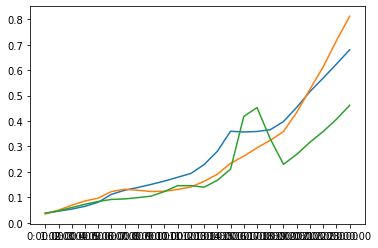

In [3]:
# starting the actual plot
import matplotlib.pyplot as plt
import numpy as np

#data[column_names_categories['0g/L_1']]
plt.plot(data['Replicates'],data[column_names_categories['0g/L_1']])

In [38]:
# calculate standard deviation
def get_mean_and_std(d, category):
    deviation = np.std(d[column_names_categories[category]], axis=1)
    mean = np.mean(d[column_names_categories[category]], axis=1)
    return mean, deviation

x_ax: 0, y_ax:0
x_ax: 0, y_ax:1
x_ax: 0, y_ax:2
x_ax: 0, y_ax:3
x_ax: 1, y_ax:0
x_ax: 1, y_ax:1
x_ax: 1, y_ax:2


/tmp/ipykernel_5935/2823380955.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Replicates'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_5935/2823380955.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Replicates'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_5935/2823380955.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Replicates'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_5935/2823380955.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Replicates'], rotation = 60, ha="center", position=(0.0,0.05))
/tmp/ipykernel_5935/2823380955.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xtickl

x_ax: 1, y_ax:3


/tmp/ipykernel_5935/2823380955.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y_ax,x_ax].set_xticklabels(data['Replicates'], rotation = 60, ha="center", position=(0.0,0.05))


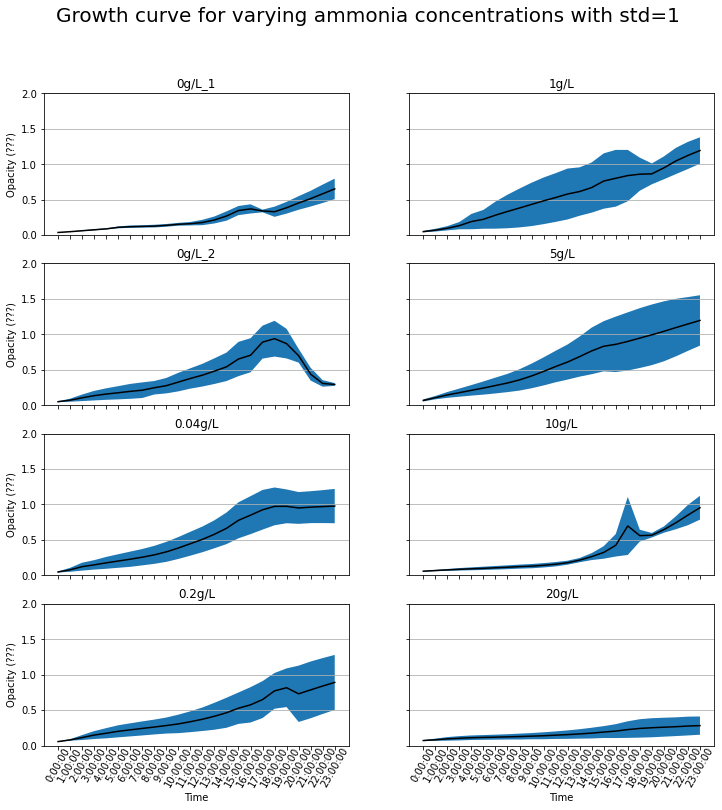

In [66]:
# Plot of the average with error bars

# Creating individual subplots
fig, axs = plt.subplots(4,2, sharex=True, sharey=True, figsize=(12,12))

# For each category, create plot the average and std
for i, category in enumerate(categories):
    x_ax = int(i/4)
    y_ax = i%4
    print(f"x_ax: {x_ax}, y_ax:{y_ax}")
    mean, deviation = get_mean_and_std(data, category)
    axs[y_ax,x_ax].plot(data['Replicates'], mean, 'k-')
    axs[y_ax,x_ax].fill_between(data['Replicates'], mean-deviation, mean+deviation)
    axs[y_ax,x_ax].set_xticklabels(data['Replicates'], rotation = 60, ha="center", position=(0.0,0.05))
    axs[y_ax,x_ax].yaxis.grid()
    axs[y_ax,x_ax].set_title(category)
# set labels
plt.setp(axs[-1, :], xlabel='Time')
plt.setp(axs[:, 0], ylabel='Opacity (???)')
plt.suptitle('Growth curve for varying ammonia concentrations with std=1', fontsize=20)
plt.ylim([0,2])
plt.savefig('Final_figure')
plt.show()